# Data Loading and Preparation

This section loads the preprocessed dataset from a CSV file and prepares it for modeling. It begins by disabling warnings for cleaner output and then reads in the data using pandas. The target column 'No-show' is renamed to 'NoShow' for convenience and clarity. The shape of the dataset is printed, and the first few rows are displayed to understand the structure of the data.

In [41]:
import warnings
warnings.filterwarnings("ignore")

#Basic dataset overview
import pandas as pd

# Load the dataset
#df = pd.read_csv(r"C:\Users\Asus\Downloads\ML Project\ML_Project\preprocessed_dataset.csv")
df = pd.read_csv('/content/preprocessed_dataset.csv')

# Rename target column
df.rename(columns={'No-show': 'NoShow'}, inplace=True)

# View dimensions and rows
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.head()

Rows: 110526, Columns: 149


,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,DaysBetween,ScheduledWeekday,...,AppointmentDay_2016-05-25T00:00:00.000000000,AppointmentDay_2016-05-30T00:00:00.000000000,AppointmentDay_2016-05-31T00:00:00.000000000,AppointmentDay_2016-06-01T00:00:00.000000000,AppointmentDay_2016-06-02T00:00:00.000000000,AppointmentDay_2016-06-03T00:00:00.000000000,AppointmentDay_2016-06-06T00:00:00.000000000,AppointmentDay_2016-06-07T00:00:00.000000000,AppointmentDay_2016-06-08T00:00:00.000000000,NoShow
0,0,0.539130,0,1,0,0,0,0,0.032432,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,0.486957,0,0,0,0,0,0,0.032432,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,0.539130,0,0,0,0,0,0,0.032432,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,0.069565,0,0,0,0,0,0,0.032432,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0,0.486957,0,1,1,0,0,0,0.032432,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


The dataset is already cleaned and transformed using a ColumnTransformer pipeline. Specifically, categorical variables were one-hot encoded and numerical features were scaled. The No-show target column has been renamed to NoShow for easier access. This step ensures that the dataset is in a machine-learning-ready format, with all features properly encoded and scaled.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110526 entries, 0 to 110525
Columns: 149 entries, Gender to NoShow
dtypes: float64(138), int64(11)
memory usage: 125.6 MB


DataFrame has:
*   110,526 rows (individual records or samples).
*   149 columns (features), ranging from Gender to NoShow.
*   Among these columns:
  *   138 are of type float64 — likely continuous numerical features.
  *   11 are of type int64 — probably categorical labels or counters.


# Logistic Regression

In the initial modeling stage, we apply Logistic Regression as a baseline classifier to predict whether a patient will miss a medical appointment, as indicated by the binary target variable NoShow. Logistic Regression is selected for its simplicity, interpretability, and computational efficiency—making it ideal for establishing a benchmark. Observing our dataset, we found that a relatively small number of features carried significant predictive power, and that the dataset exhibits notable class imbalance, with the majority of patients showing up for their appointments. This imbalance may influence the model’s performance, potentially biasing predictions toward the majority class. We hypothesize that while Logistic Regression may capture some linear relationships between features and the target, its performance could be limited by this imbalance and by non-linear patterns that it cannot model effectively. Therefore, we expect Logistic Regression to provide a useful but **MODEST** baseline.

## Default Model

In [43]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Target and Features
y = df['NoShow']
X = df.drop(columns=['NoShow'])

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

print("\nTest set performance:")
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on train set: 0.80
Accuracy of logistic regression classifier on test set: 0.80

Test set performance:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89     17642
           1       0.41      0.02      0.04      4464

    accuracy                           0.80     22106
   macro avg       0.60      0.51      0.46     22106
weighted avg       0.72      0.80      0.72     22106



* Implemented baseline Logistic Regression with default parameters (no tuning).
* Though called "regression," it’s a classification model that uses a sigmoid function to produce class probabilities.
* Uses a default 0.5 threshold to assign class labels (0 = Show, 1 = NoShow).
* Accuracy: 80% on both training and test sets.
* Issue: Very poor performance on the minority class (NoShow):
* Recall: 2%, F1-score: 0.04
* Conclusion: Model fails to detect NoShow cases due to class imbalance — needs further improvement.

## Hyperparameter Tuning


*   C: Inverse of regularization strength (float)	Lower values = stronger regularization (can prevent overfitting)
  *   Vaules used: 0.001 , 0.01, 1, 10
*   Penalty: Regularization type. 'l2': Default, good for most cases.
'l1': For sparse models (requires solver like 'liblinear').
  *   Vaules used: l1, l2
*   Solver: Optimization algorithm ('liblinear', 'saga', etc.)	Use 'liblinear' Works with both l1 and l2, good for small datasets.; 'lbfgs': Default for l2, works for larger datasets.
  *   Vaules used: liblinear, lbfgs
*   class_weight: Helps address imbalance in classes
  *   Vaules used: None, balanced


*   Custom Threshold (Not a built-in hyperparameter)
  *   After training, manually adjusting the threshold used to classify based on predicted probabilities:
  *   Vaules used: thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]


Each model is trained and evaluated using the same metrics as before. Results are stored in a list, converted into a DataFrame, and saved to a CSV file for further inspection.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np

# Hyperparameter options
C_values = [0.001, 0.01, 1, 10]
penalties = ['l1', 'l2']
solvers = ['liblinear', 'lbfgs']
class_weights = [None, 'balanced']
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

valid_combinations = {
    'l1': ['liblinear'],  # l1 only works with liblinear
    'l2': ['liblinear', 'lbfgs']  # l2 works with both
}

results = []
combination_number = 0

for C in C_values:
    for penalty in penalties:
        for solver in valid_combinations[penalty]:
            for cw in class_weights:
                for threshold in thresholds:
                    try:
                        model = LogisticRegression(C=C, penalty=penalty, solver=solver,
                                                  class_weight=cw, max_iter=1000,
                                                  random_state=42)
                        model.fit(X_train, y_train)
                        y_probs = model.predict_proba(X_test)[:, 1]
                        y_pred = (y_probs >= threshold).astype(int)

                        # Calculate metrics
                        accuracy = accuracy_score(y_test, y_pred)
                        precision = precision_score(y_test, y_pred, zero_division=0)
                        recall = recall_score(y_test, y_pred, zero_division=0)
                        f1 = f1_score(y_test, y_pred, zero_division=0)

                        results.append({
                            "C": C,
                            "Penalty": penalty,
                            "Solver": solver,
                            "Class Weight": str(cw),  # Convert None to string for better CSV output
                            "Threshold": threshold,
                            "Accuracy": accuracy,
                            "Precision": precision,
                            "Recall": recall,
                            "F1 Score": f1
                        })
                        combination_number += 1
                    except Exception as e:
                        print(f"Error with combination C={C}, penalty={penalty}, solver={solver}, "
                              f"class_weight={cw}, threshold={threshold}: {e}")
                        continue

# Convert to DataFrame
results_df = pd.DataFrame(results)

results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# Save to CSV
results_df.to_csv('logistic_regression_results.csv', index=False)

# Show total combinations tested and top results
print(f"Total combinations tested: {combination_number}")
print("\nTop 10 best performing models:")
print(results_df.head(10))


Total combinations tested: 120

Top 10 best performing models:
        C Penalty     Solver Class Weight  Threshold  Accuracy  Precision  \
0  10.000      l2  liblinear         None        0.6  0.798245   0.543478   
1   1.000      l2      lbfgs         None        0.6  0.798245   0.547619   
2   1.000      l1  liblinear         None        0.6  0.798245   0.547619   
3  10.000      l1  liblinear         None        0.6  0.798245   0.543478   
4  10.000      l2      lbfgs         None        0.6  0.798200   0.533333   
5   1.000      l2  liblinear         None        0.6  0.798200   0.536585   
6  10.000      l2  liblinear         None        0.7  0.798109   0.555556   
7   0.010      l2      lbfgs         None        0.6  0.798109   1.000000   
8   0.001      l2  liblinear     balanced        0.7  0.798109   1.000000   
9   0.001      l2      lbfgs     balanced        0.7  0.798109   1.000000   

     Recall  F1 Score  
0  0.005600  0.011086  
1  0.005152  0.010209  
2  0.005152  0.01

The initial model evaluation without balancing techniques tested 120 parameter combinations, focusing on hyperparameters like regularization strength (C), penalty type, solver, class weight, and decision threshold. The top-performing models achieved an accuracy close to 0.798, but their recall scores were extremely low (around 0.005), indicating that while the models are good at predicting the majority class, they fail to correctly identify the minority class instances. Precision varied moderately, but overall, the models suffer from poor sensitivity to the positive class, highlighting the classic imbalance problem where high accuracy is misleading due to the dominant negative class.

Balancing the dataset : Apply SMOTE

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Check class distribution before SMOTE
print("Class distribution before SMOTE:")
print(pd.Series(y_train).value_counts(normalize=True))

Class distribution before SMOTE:
NoShow
0    0.798066
1    0.201934
Name: proportion, dtype: float64


In [45]:
# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts(normalize=True))

Class distribution after SMOTE:
NoShow
1    0.5
0    0.5
Name: proportion, dtype: float64


In [ ]:
C_values = [0.001, 0.01, 1, 10]
penalties = ['l1', 'l2']
solvers = ['liblinear', 'lbfgs']
class_weights = [None, 'balanced']
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

# Define valid solver/penalty combinations
valid_combinations = {
    'l1': ['liblinear'],  # l1 only works with liblinear
    'l2': ['liblinear', 'lbfgs']  # l2 works with both
}

results = []
combination_number = 0

for C in C_values:
    for penalty in penalties:
        for solver in valid_combinations[penalty]:
            for cw in class_weights:
                for threshold in thresholds:
                    try:
                        model = LogisticRegression(C=C, penalty=penalty, solver=solver,
                                                  class_weight=cw, max_iter=1000,
                                                  random_state=42)
                        # Fit model on SMOTE-resampled data
                        model.fit(X_train_smote, y_train_smote)

                        # Evaluate on the original test set
                        y_probs = model.predict_proba(X_test)[:, 1]
                        y_pred = (y_probs >= threshold).astype(int)

                        # Calculate metrics
                        accuracy = accuracy_score(y_test, y_pred)
                        precision = precision_score(y_test, y_pred, zero_division=0)
                        recall = recall_score(y_test, y_pred, zero_division=0)
                        f1 = f1_score(y_test, y_pred, zero_division=0)

                        results.append({
                            "C": C,
                            "Penalty": penalty,
                            "Solver": solver,
                            "Class Weight": str(cw),  # Convert None to string for better CSV output
                            "Threshold": threshold,
                            "Accuracy": accuracy,
                            "Precision": precision,
                            "Recall": recall,
                            "F1 Score": f1
                        })
                        combination_number += 1
                    except Exception as e:
                        print(f"Error with combination C={C}, penalty={penalty}, solver={solver}, "
                              f"class_weight={cw}, threshold={threshold}: {e}")
                        continue

# Results as DataFrame
results_df = pd.DataFrame(results)

# Sort by accuracy (descending) and reset index to start from 1
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# Save results to CSV
results_df.to_csv('logistic_regression_results.csv', index=False)

# Show total combinations tested and top results
print(f"Total combinations tested: {combination_number}")
print("\nTop 10 best performing models:")
print(results_df.head(10))

Total combinations tested: 120

Top 10 best performing models:
       C Penalty     Solver Class Weight  Threshold  Accuracy  Precision  \
0  0.001      l1  liblinear         None        0.7  0.798064   0.000000   
1  0.001      l1  liblinear     balanced        0.7  0.798064   0.000000   
2  0.001      l2      lbfgs     balanced        0.7  0.797159   0.222222   
3  0.001      l2  liblinear     balanced        0.7  0.797159   0.222222   
4  0.001      l2      lbfgs         None        0.7  0.797159   0.222222   
5  0.001      l2  liblinear         None        0.7  0.797159   0.222222   
6  0.001      l1  liblinear         None        0.6  0.796164   0.255814   
7  0.001      l1  liblinear     balanced        0.6  0.796164   0.255814   
8  0.010      l1  liblinear     balanced        0.7  0.780060   0.329331   
9  0.010      l1  liblinear         None        0.7  0.780060   0.329331   

     Recall  F1 Score  
0  0.000000  0.000000  
1  0.000000  0.000000  
2  0.001792  0.003556  
3  0

After applying SMOTE to balance the classes equally, the models were re-evaluated with the same hyperparameter search. The class distribution after SMOTE is perfectly balanced (50-50), but the overall accuracy slightly decreased compared to Section 1, reflecting the increased challenge of correctly classifying a more balanced dataset. Notably, precision for the best models dropped to near zero in some cases, but recall started to improve from virtually zero towards 1 as the threshold and parameters changed. The additional data shows a clear trade-off between accuracy and recall: as recall increases, the accuracy decreases, indicating the models become more sensitive to detecting positive cases but at the cost of more false positives. This behavior is typical in imbalanced classification where improving minority class detection often reduces overall accuracy. These results highlight the importance of carefully balancing precision, recall, and accuracy based on the problem goals.



---



# Visualizing the Optimal Logistic Regression Model

### Confusion Matrix (with Heatmap)

Without Smote

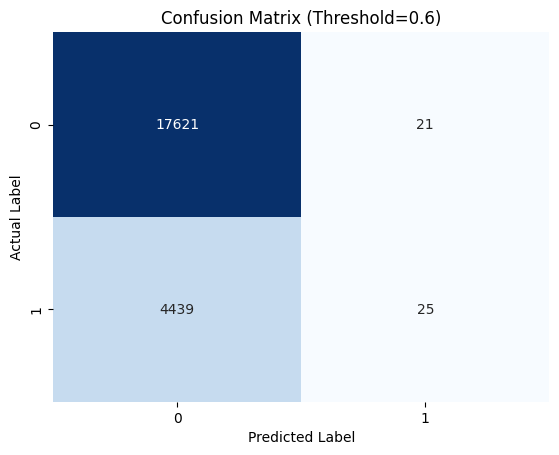

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

model = LogisticRegression(
    C=10,
    penalty='l2',
    solver='liblinear',
    class_weight=None,
    max_iter=1000,
    random_state=42
)

model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:, 1]

threshold = 0.6
y_pred = (y_proba >= threshold).astype(int)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix (Threshold=0.6)")
plt.show()


With Smote

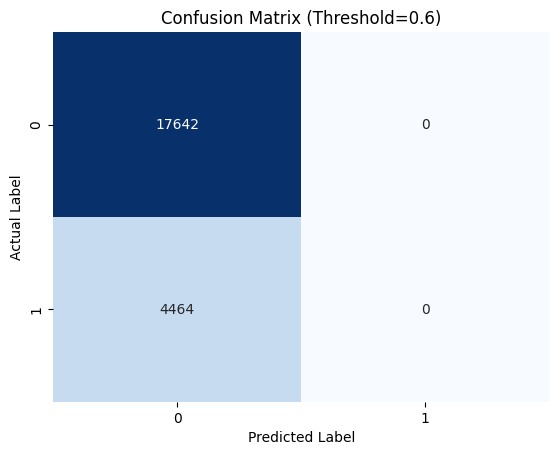

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

model = LogisticRegression(
    C=0.001,
    penalty='l1',
    solver='liblinear',
    class_weight=None,
    max_iter=1000,
    random_state=42
)
model.fit(X_train_smote, y_train_smote)

y_proba = model.predict_proba(X_test)[:, 1]

threshold = 0.7
y_pred = (y_proba >= threshold).astype(int)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix (Threshold=0.6)")
plt.show()


### First Confusion Matrix (Without SMOTE - Logistic Regression)
* Threshold: 0.6
* True Negatives (TN): 17,621
* False Positives (FP): 21
* False Negatives (FN): 4,439
* True Positives (TP): 25
* Observation:
 * Extremely high number of false negatives (FN).
 * Very few positive instances are correctly predicted.
 * Slight imbalance toward classifying everything as 0 (negative).


### Second Image Confusion Matrix (With SMOTE - Logistic Regression)
* Threshold: 0.7
* True Negatives (TN): 17,642
* False Positives (FP): 0
* False Negatives (FN): 4,464
* True Positives (TP): 0
* Observation:
 * Model predicted zero positive cases — TP is 0.
 * All positive instances are misclassified as negative.
 * Worse performance for detecting class 1 (positive), despite SMOTE.


The confusion matrices show how applying SMOTE influenced the performance of logistic regression with a decision threshold of 0.6. Without SMOTE, the model managed to identify 25 true positives but still suffered from a large number of false negatives, indicating poor recall. With SMOTE, the model predicted all samples as negative (class 0), failing entirely to identify any true positives. This suggests that SMOTE did not improve the model's performance in this case, possibly due to overfitting on synthetic samples or poor class separability at the chosen threshold. Additionally, using a high threshold (0.7) on an imbalanced dataset likely exacerbated the issue by being too conservative in predicting the positive class.


### Precision-Recall Curve

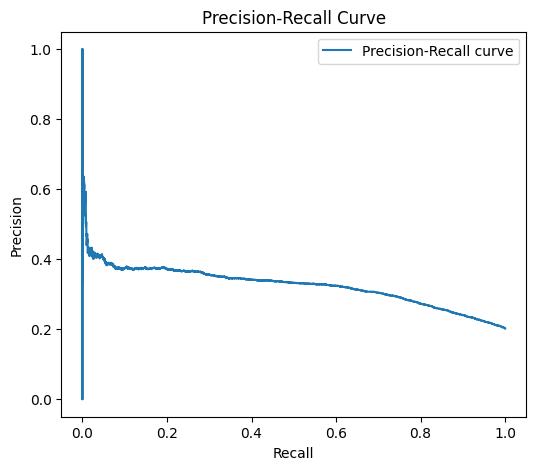

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

This precision-recall curve indicates suboptimal model performance for the no-show prediction task. The curve shows a rapid drop in precision as recall increases, stabilizing around 0.35-0.40 precision for most recall values. This pattern is typical of imbalanced classification problems where the positive class (no-shows) is rare. The steep initial drop suggests that while the model can identify some no-shows with high precision, it struggles to maintain precision when attempting to capture more of the positive cases. The area under the curve appears relatively low, confirming limited predictive power.

### Feature Importance

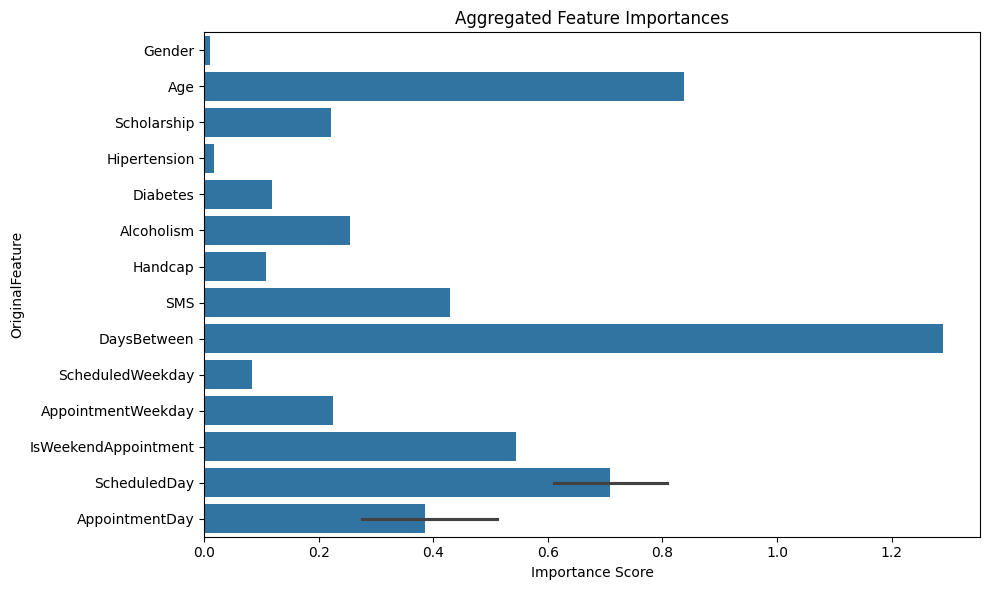

In [ ]:
feature_importance = model.coef_[0]
feature_names = X_train.columns  # Assuming X_train is a DataFrame

# Extract feature importances
coefficients = model.coef_[0]
features = X_train.columns

# Create DataFrame
feat_df = pd.DataFrame({'Feature': features, 'Importance': np.abs(coefficients)})

# Extract original feature name (before underscore for one-hot columns)
feat_df['OriginalFeature'] = feat_df['Feature'].apply(lambda x: x.split('_')[0])

# Group by original feature
grouped_feat = feat_df.groupby('OriginalFeature')['Importance'].sum().reset_index()
grouped_feat = grouped_feat.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='OriginalFeature', data=feat_df)
plt.title("Aggregated Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("OriginalFeature")
plt.tight_layout()
plt.show()

The feature importance chart reveals that "DaysBetween" is overwhelmingly the most important predictor of no-shows, with an importance score exceeding 1.2. The second most important feature is patient "Age" (score 0.9), followed by "ScheduledDay" (0.8) and "IsWeekendAppointment" (0.6). Healthcare-related features like "SMS" (reminder messages), "Alcoholism," and "Scholarship" have moderate importance, while "Gender," "Hipertension," and "Handcap" contribute minimally. This suggests that appointment timing and patient demographics are more predictive than medical conditions for this specific no-show prediction problem.



---

# Logistic Regression Model Evaluation Summary

### 1. Initial Model Performance (Before Balancing)
An extensive grid search was performed to evaluate 120 combinations of Logistic Regression hyperparameters, including regularization strength (C), penalty type, solver, class weight, and decision thresholds. The dataset was highly imbalanced, with the majority of instances belonging to the negative class (patients who attended appointments).

* Best Accuracy Achieved: ~0.798
* Recall: Extremely low (≈ 0.005)
* Precision: Varied moderately
* Key Issues:
 * Despite high accuracy, the model failed to correctly identify no-show cases.
 * The near-zero recall highlighted that the model was almost completely blind to the minority class.
 * This scenario reflects the classic pitfall in imbalanced classification: high overall accuracy can be misleading when driven by the dominant class.

### 2. Performance After Applying SMOTE
To mitigate class imbalance, SMOTE (Synthetic Minority Oversampling Technique) was applied, resulting in a perfectly balanced training dataset (50% show vs. 50% no-show). The same hyperparameter tuning process was repeated post-balancing.

* Accuracy: Slightly decreased compared to the imbalanced setup
* Precision: Dropped significantly, in some cases approaching zero
* Recall: Gradually increased from near zero to higher values, depending on threshold tuning
* Observation:
 * A clear trade-off emerged: as recall improved (the model detected more no-show cases), accuracy declined due to an increase in false positives.
 * This behavior is typical in imbalanced problems when the focus shifts toward improving sensitivity at the cost of precision.

Logistic Regression performed poorly for the no-show prediction task, regardless of balancing techniques. While initial models achieved deceptively high accuracy, they failed to detect the minority class. Even after applying SMOTE, improvements in recall came at the expense of precision and overall accuracy, with some configurations failing to identify any no-shows at all.

These findings reinforce the need for:
* Exploring more advanced models (e.g., decision trees, ensemble methods)
* Tuning decision thresholds based on precision-recall trade-offs
* Applying additional techniques like cost-sensitive learning or hybrid sampling

Logistic Regression, in its current form, is not suitable as a standalone model for this task due to its inability to reliably capture the minority class behavior.
